In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
fashion_mnist = keras.datasets.fashion_mnist
# split into testing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# 60,000 images, made up of 28x28 pixels
# these images are grayscale
train_images.shape

(60000, 28, 28)

In [4]:
# look at first 10 labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [5]:
# create arry of label names to indicate which is which
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

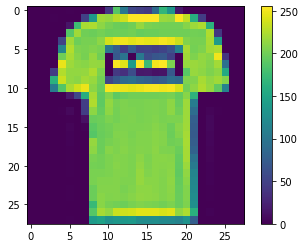

In [7]:
# looking at one image
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# data preprocessing
# for this example, we are making all values between 1 and 0 (easier for model to process)
train_images = train_images/255.0
test_images = test_images/255.0

In [9]:
# building the model
# this one has 3 different levels, a feed forward neural network using a keras sequential model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1) 28x28 neurons
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2) random number, really depends on the problem
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [10]:
# compile the model, hyper parameter tuning
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
# Training the model
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5023 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3800 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3403 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3131 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2975 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2826 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2490 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [12]:
# Evaluating the model, evaluating on test shows that our model is overfitting. Test accuracy is lower than train accuracy
# vary epochs and hyper parameters to determine the best model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.8827
Test accuracy: 0.8827000260353088


In [15]:
# making predictions
predictions = model.predict(test_images)
print(predictions)

[[4.3970569e-09 1.0443931e-08 6.9629129e-07 ... 1.1921408e-01
  5.2557272e-07 8.7987006e-01]
 [1.7212356e-04 1.3695826e-11 9.9585187e-01 ... 7.2088521e-13
  3.6128856e-08 2.3340747e-15]
 [1.2931578e-06 9.9999869e-01 6.5432250e-11 ... 2.3829235e-20
  1.9014051e-13 7.4730380e-15]
 ...
 [4.5808079e-07 2.5475009e-11 1.0219678e-06 ... 3.6772088e-10
  9.9996448e-01 1.3959047e-11]
 [3.6339645e-09 9.9999976e-01 5.3494625e-11 ... 1.1934255e-12
  1.5754308e-11 1.2012766e-09]
 [2.0589246e-06 2.8625681e-08 3.7748412e-06 ... 9.1374824e-03
  1.4002181e-05 3.3853787e-06]]


In [14]:
# probability distribution that was caluclated on our output layer
predictions[0]

array([4.3970569e-09, 1.0443931e-08, 6.9629129e-07, 7.0453723e-09,
       5.1438735e-07, 9.1406400e-04, 7.7168538e-09, 1.1921408e-01,
       5.2557272e-07, 8.7987006e-01], dtype=float32)

9
Ankle boot


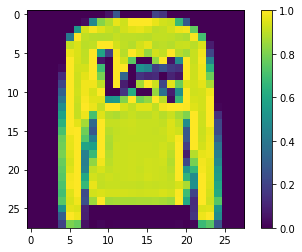

In [22]:
# index of the maximum value in our list
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Excpected: Coat
Guess: Coat


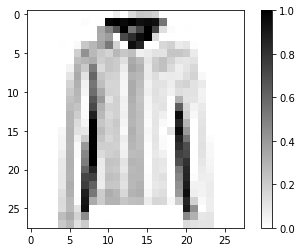

In [24]:
# Verifying predictions
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  print("Excpected: " + label)
  print("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)